# Probability Mass Functions

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## The Class Size Paradox

Let's handle the class size paradox.

In [54]:
bin_width = 5
ranges = pd.interval_range(start=5, end=50, freq=bin_width, closed="left", name="class_size")
ranges

IntervalIndex([ [5, 10), [10, 15), [15, 20), [20, 25), [25, 30), [30, 35),
               [35, 40), [40, 45), [45, 50)],
              dtype='interval[int64, left]', name='class_size')

In [55]:
from pandas._libs import interval


df = pd.DataFrame(index=ranges)
df = df.reset_index()
df["average_size"] = df["class_size"].apply(lambda x: x.left + 2)
df["count"] = [8, 8, 14, 4, 6, 12, 8, 3, 2]

In [56]:
df

,class_size,average_size,count
0,"[5, 10)",7,8
1,"[10, 15)",12,8
2,"[15, 20)",17,14
3,"[20, 25)",22,4
4,"[25, 30)",27,6
5,"[30, 35)",32,12
6,"[35, 40)",37,8
7,"[40, 45)",42,3
8,"[45, 50)",47,2


We created a frequency table from different class sizes and how many of those classes.

In [57]:
total_count = df["count"].sum()
df["probability"] = df["count"] / total_count
df["average_size"].mean()
mean = (df["average_size"] * df["count"]).sum() / df["count"].sum()
mean

np.float64(23.692307692307693)

We created a PDF column to see the probability of those class sizes. And if we try to find the mean using the classes as the element of measurement, it is 23.69. But this mean doesn't represent the student's perspective. If we pick a random student, their average class size wouldn't be 23.69. We have to find the weighted mean.

In [58]:
weighted_mean = (df["average_size"] * df["count"] * df["average_size"]).sum() / (df["average_size"] * df["count"]).sum()
weighted_mean

np.float64(29.123376623376622)

By multiplying by average size again, we actually accounted all of the student's answers. For example, for the group at 0 index, we accounted all "We have 7 people in average in our class" answers from those 7 students.

We used this formula to find the probability from the class perspective:

$$
\frac{\text{(Number of classes for the }i^{th}\text{ class type)}}{\text{Total amount of classes}}
$$

But for the student's perspective, we have to find the biased probability, using the below formula:

$$
\frac{\text{(Number of students for the }i^{th}\text{ class type)} \times \text{(Number of classes for the }i^{th}\text{ class type)}}{\text{Total amount of students}}
$$

In [59]:
total_students = (df["average_size"] * df["count"]).sum()
df["biased_probability"] = (df["average_size"] * df["count"]) / total_students
df

,class_size,average_size,count,probability,biased_probability
0,"[5, 10)",7,8,0.123077,0.036364
1,"[10, 15)",12,8,0.123077,0.062338
2,"[15, 20)",17,14,0.215385,0.154545
3,"[20, 25)",22,4,0.061538,0.057143
4,"[25, 30)",27,6,0.092308,0.105195
5,"[30, 35)",32,12,0.184615,0.249351
6,"[35, 40)",37,8,0.123077,0.192208
7,"[40, 45)",42,3,0.046154,0.081818
8,"[45, 50)",47,2,0.030769,0.061039


And if we plot them, we can see the difference between `actual` and `biased` probabilites clearly.

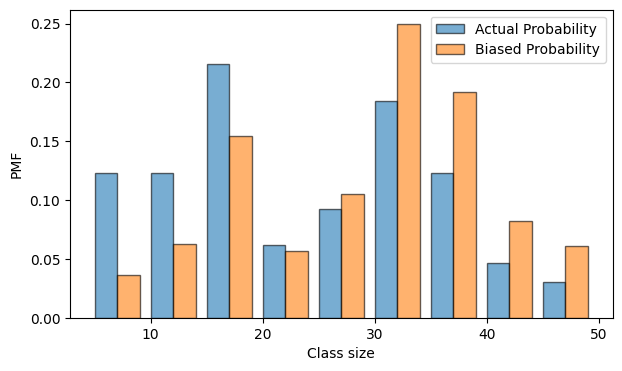

In [60]:
fig, ax = plt.subplots(figsize=(7,4))
width = 2

ax.bar(x=df["average_size"] - width/2, height=df["probability"], width=width, label="Actual Probability", edgecolor="black", alpha=0.6)
ax.bar(x=df["average_size"] + width/2, height=df["biased_probability"], width=width, label="Biased Probability", edgecolor="black", alpha=0.6)
ax.legend()
ax.set_xlabel("Class size")
ax.set_ylabel("PMF")
plt.show()

## NSFG Data

Let's use PMF with our beloved 2002FemPreg data. We will compare the first babies with other babies with PMF to get a better result since PMF normalizes the data.

In [61]:
preg = pd.read_csv("./data/2002FemPreg_after_01.csv")
preg
first = preg[(preg["outcome"] == 1) & (preg["birthord"] == 1)]
other = preg[(preg["outcome"] == 1) & (preg["birthord"] != 1)]

Let's turn them into PMFs

In [62]:
week_first_pmf = first["prglngth"].value_counts(normalize=True)
week_other_pmf = other["prglngth"].value_counts(normalize=True)

We have the frequency tables. Now let's plot them.

(np.float64(-0.65), np.float64(22.650000000000002))


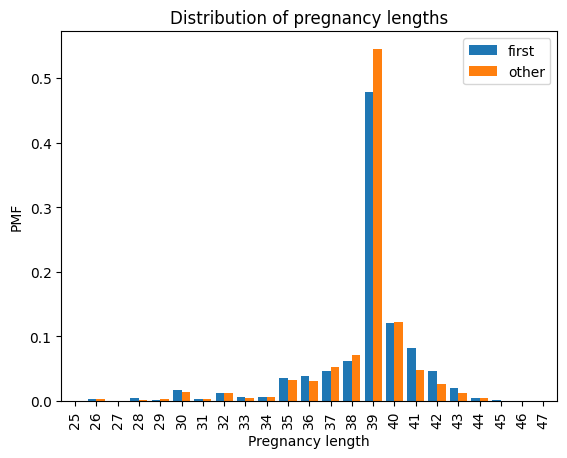

In [63]:
df_pmf = pd.concat([week_first_pmf, week_other_pmf], axis=1, keys=["first", "other"]).sort_index().fillna(0)

ax = df_pmf.loc[25:47].plot(kind="bar",width=0.8)

print(ax.get_xlim())
ax.set_title("Distribution of pregnancy lengths")
ax.set_xlabel("Pregnancy length")
ax.set_ylabel("PMF")
plt.show()

Based on the figure, first babies seem to be less likely than others to arrive on time. And more likely to be late.

We can also visualize the differences.

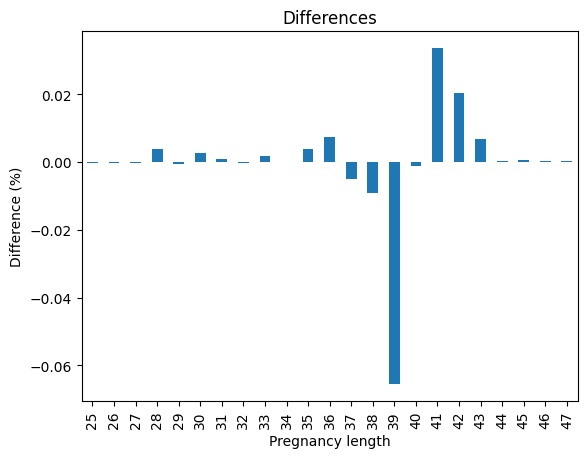

In [64]:
df_pmf["difference"] = df_pmf["first"] - df_pmf["other"]
ax = df_pmf["difference"].loc[25:47].plot(kind="bar")
ax.set_title("Differences")
ax.set_ylabel("Difference (%)")
ax.set_xlabel("Pregnancy length")
plt.show()

We can see the difference clearly now, but we can't be sure about our assumptions either. We will investigate this further on the hypothesis testing chapter.

## Exercises

In [65]:
from statadict import parse_stata_dict
fem_dict = parse_stata_dict('./data/2002FemResp.dct')
fem = pd.read_fwf('./data/2002FemResp.dat', names=fem_dict.names, colspecs=fem_dict.colspecs)

<Axes: xlabel='numbabes'>

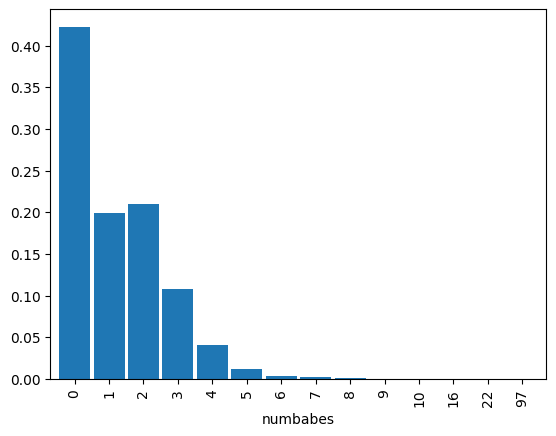

In [66]:
fem["numbabes"].value_counts(normalize=True).sort_index().plot(kind="bar", width=0.9)

A lot of the women in this survey don't have babies. We can also say that plot is skewed to the right.

Before our next exercise, let's change an impossible value with 0, which is a woman having 97 babies.

In [67]:
fem["numbabes"] = fem["numbabes"].replace(97,np.nan)

We can calculate the skewness with the below formulas:

$$
\text{Skew (for sample)} = \frac{N}{(N-1)(N-2)} \times \frac{\sum(x-\bar{x})^3}{s^3} 
$$

$$
\text{Skew (for population)} = \frac{\sum(x-\mu)^3}{\sigma^3} 
$$

In [68]:
n = fem["numbabes"].count()
x_hat = fem["numbabes"].mean()
std = fem["numbabes"].std()
deviations = fem["numbabes"] - x_hat
skewness = (n / ((n-1)*(n-2))) * ((deviations / std)**3).sum()
skewness

np.float64(1.7022255640185795)

In [69]:
fem["numbabes"].skew()

np.float64(1.70222556401858)

<img src="./assets/skewness.png" height="300"/>

If we have the probability column and not the actual column (PMF), we can calculate the skewness with the below formula.

In [70]:
kdhh = fem["numkdhh"]
kdhh_freq = kdhh.value_counts()
kdhh_freq

numkdhh
0    3563
1    1636
2    1500
3     666
4     196
5      82
Name: count, dtype: int64

In [71]:
actual_mean = (kdhh_freq.index * kdhh_freq).sum() / kdhh_freq.sum()
actual_mean

np.float64(1.024205155043831)

In [72]:
biased_freq = kdhh_freq * kdhh_freq.index
biased_freq

numkdhh
0       0
1    1636
2    3000
3    1998
4     784
5     410
dtype: int64

In [73]:
biased_mean = (biased_freq.index * biased_freq).sum() / biased_freq.sum()
biased_mean

np.float64(2.403679100664282)

In [74]:
normalized_freq = kdhh.value_counts(normalize=True).sort_index()
normalized_freq

numkdhh
0    0.466178
1    0.214052
2    0.196258
3    0.087139
4    0.025644
5    0.010729
Name: proportion, dtype: float64

In [75]:
normalized_biased_freq = normalized_freq * normalized_freq.index
normalized_biased_freq

numkdhh
0    0.000000
1    0.214052
2    0.392516
3    0.261416
4    0.102578
5    0.053644
dtype: float64

Here, we found the biased (children's perspective) and actual (family perspective, raw data) frequency tables and means of the `kdhh` column. Let's create a PDF plot to wrap things up.

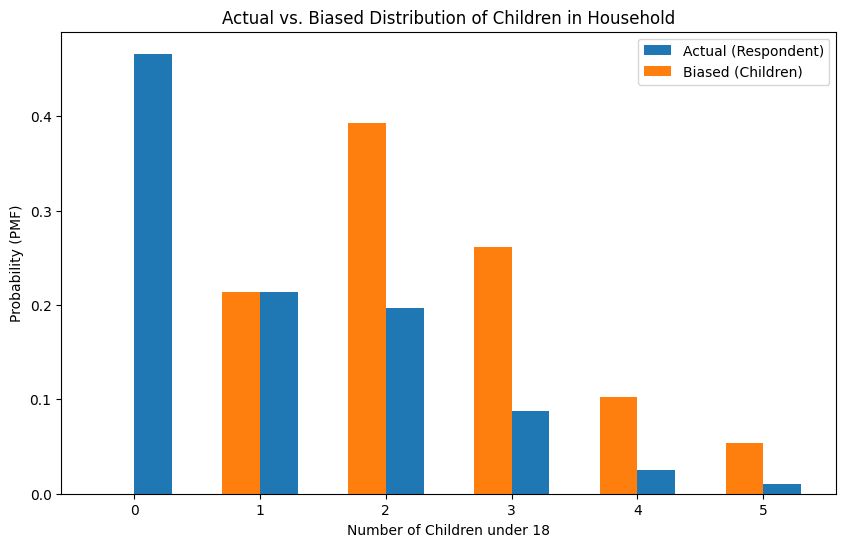

In [76]:
width = 0.3
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(normalized_freq.index + width / 2, normalized_freq, width=width, label="Actual (Respondent)")
ax.bar(normalized_biased_freq.index - width / 2, normalized_biased_freq, width=width, label="Biased (Children)")
ax.set_xlabel("Number of Children under 18")
ax.set_ylabel("Probability (PMF)")
ax.set_title('Actual vs. Biased Distribution of Children in Household')
ax.legend()
plt.show()

## Glossary from the resource 

- **normalized:** A set of probabilities are normalized if they add up to 1.
- **probability mass function (PMF):** A function that represents a distribution by mapping each quantity to its probability.